In [19]:
import itertools
import urllib.request
import numpy as np
import math
from sklearn.preprocessing import PolynomialFeatures
from liblinear.liblinearutil import *
import matplotlib.pyplot as plt

In [20]:
def transform(X, Q):
    X_output = np.ones_like(X[:, 0])[np.newaxis, :]
    for L in range(1, Q+1):
        for subset in itertools.combinations_with_replacement(range(len(X[0])), L):
            tmp = np.ones_like(X[:, 0])[np.newaxis, :]
            for idx in subset:
                tmp = tmp*X[:, idx]
            X_output = np.vstack((X_output, tmp))
    return X_output.T

In [21]:
def data(path, Q):
    data = np.genfromtxt(path)
    y, X_data = data[:, -1], transform(data[:, :-1], Q)
    return X_data, y

10

In [22]:
Q = 3
x_train, y_train = data("hw4_train.dat", Q)
#x_test, y_test = data("hw4_test.dat", Q)

log_lambdas = np.array([2, 0, -2, -4, -6], dtype=float)
ans = np.zeros((3, 5))
for i in range(len(log_lambdas)):
    prob = problem(y_train, x_train)

    params = parameter(f"-s 0 -c {1/10**log_lambdas[i]/2} -e 0.000001 -q")
    m = train(prob, params)
    p_label, p_acc, p_val = predict(y_train, x_train, m, "-q")
    ans[0][i] = p_acc[0]

print(100-ans)

argans = np.argmax(ans, axis=1)
print(log_lambdas[argans])

[[ 19.5  12.5   9.    8.    4. ]
 [100.  100.  100.  100.  100. ]
 [100.  100.  100.  100.  100. ]]
[-6.  2.  2.]


In [23]:
def valid_split(X, y, val_size):
    idx = np.random.permutation(len(X))
    x_train = X[idx[val_size:]]
    x_val = X[idx[:val_size]]
    y_train = y[idx[val_size:]]
    y_val = y[idx[:val_size]]
    return x_train, y_train, x_val, y_val

In [24]:
def error_val(x_train, y_train, x_val, y_val):
    err = np.full(5, np.inf)
    for i in range(len(log_lambdas)):
        prob = problem(y_train, x_train)
        params = parameter(f"-s 0 -c {1/10**log_lambdas[i]/2} -e 0.000001 -q")
        m = train(prob, params)
        p_label, p_acc, p_val = predict(y_val, x_val, m, "-q")
        err[i] = 100 - p_acc[0]
        if err[i] == np.min(err):
            best_m = m

    return err, best_m

11

[ 6. 53. 61.  8.  0.]


Text(0, 0.5, 'numbers')

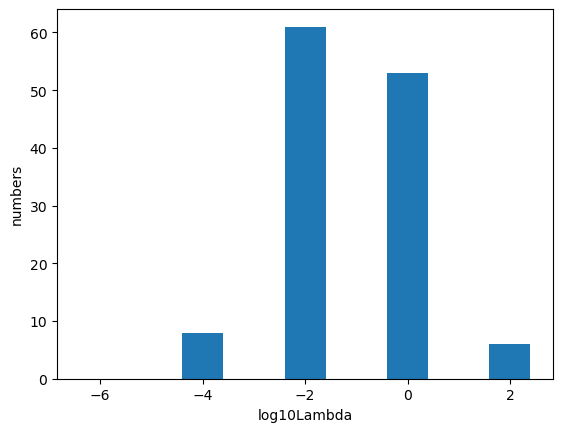

In [32]:
np.random.seed(1126)
Q = 3
x_data, y_data = data("hw4_train.dat", Q)
#x_test, y_test = data("hw4_test.dat", Q)
N, train_size, val_size = 128, 120, 80
log_lambdas = [2, 0, -2, -4, -6]

ans11 = np.zeros(5)


for i in range(N):
    # Q11: select best lambda by validation
    x_train, y_train, x_val, y_val = valid_split(x_data, y_data, val_size)
    tmp_err, tmp_m = error_val(x_train, y_train, x_val, y_val)
    #print(tmp_err)
    ans11[np.argmin(tmp_err)] += 1

#print(log_lambdas[np.argmax(ans11)], np.max(ans11))
print(ans11)
plt.bar( log_lambdas, ans11)
plt.xlabel('log10Lambda')
plt.ylabel('numbers')

In [11]:
def error_cv(x, y, V_fold, i):
    err = 0
    for v in range(V_fold):
        x_train = np.concatenate(
            (x[:len(x) // V_fold*v], x[len(x) // V_fold*(v+1):]))
        y_train = np.concatenate(
            (y[:len(y) // V_fold*v], y[len(y) // V_fold*(v+1):]))
        x_val = x[len(x) // V_fold * v: len(x) // V_fold*(v+1)]
        y_val = y[len(y) // V_fold * v: len(y) // V_fold*(v+1)]
        prob = problem(y_train, x_train)
        params = parameter(f"-s 0 -c {1/10**log_lambdas[i]/2} -e 0.000001 -q")
        m = train(prob, params)
        p_label, p_acc, p_val = predict(y_val, x_val, m, "-q")
        err += 100-p_acc[0]
    return err/V_fold

12

[ 0. 75. 52.  1.  0.]


Text(0, 0.5, 'numbers')

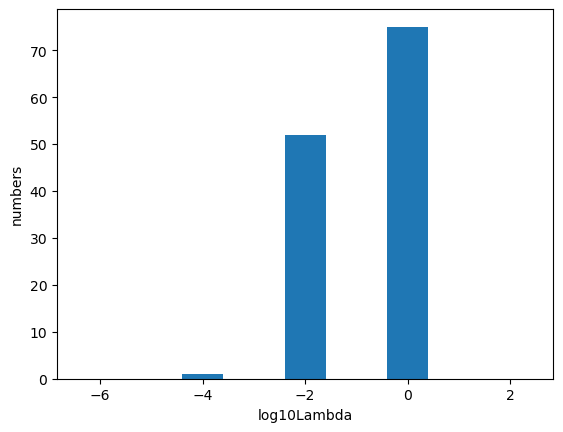

In [36]:
np.random.seed(1126)
Q = 3
x_train, y_train = data("hw4_train.dat", Q)
#x_test, y_test = data("hw4_test.dat", Q)
N, train_size, val_size = 128, 120, 80
V_fold = 5
log_lambdas = [2, 0, -2, -4, -6]

# Q12
err = np.zeros(5)
ans12 = np.zeros(5)

for j in range(N):
    for i in range(len(log_lambdas)):
        idx = np.random.permutation(len(x_train))
        err[i] = error_cv(x_train[idx], y_train[idx], V_fold, i)
        #ans12[np.argmin(err[i])] += 1
    ans12[np.argmin(err)] += 1
    #print(err)


print(ans12)
plt.bar( log_lambdas, ans12)
plt.xlabel('log10Lambda')
plt.ylabel('numbers')